Task 1: Data Understanding and Visualization:
1. Load and visualize images from a dataset stored in directories, where each subdirectory represents a class.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving FruitinAmazon.zip to FruitinAmazon.zip


In [ ]:
import zipfile
import os

zip_path = "/content/FruitinAmazon.zip"  # update if name is different
extract_to = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Check folder structure
os.listdir(extract_to)

['.config', 'FruitinAmazon.zip', 'FruitinAmazon', 'sample_data']

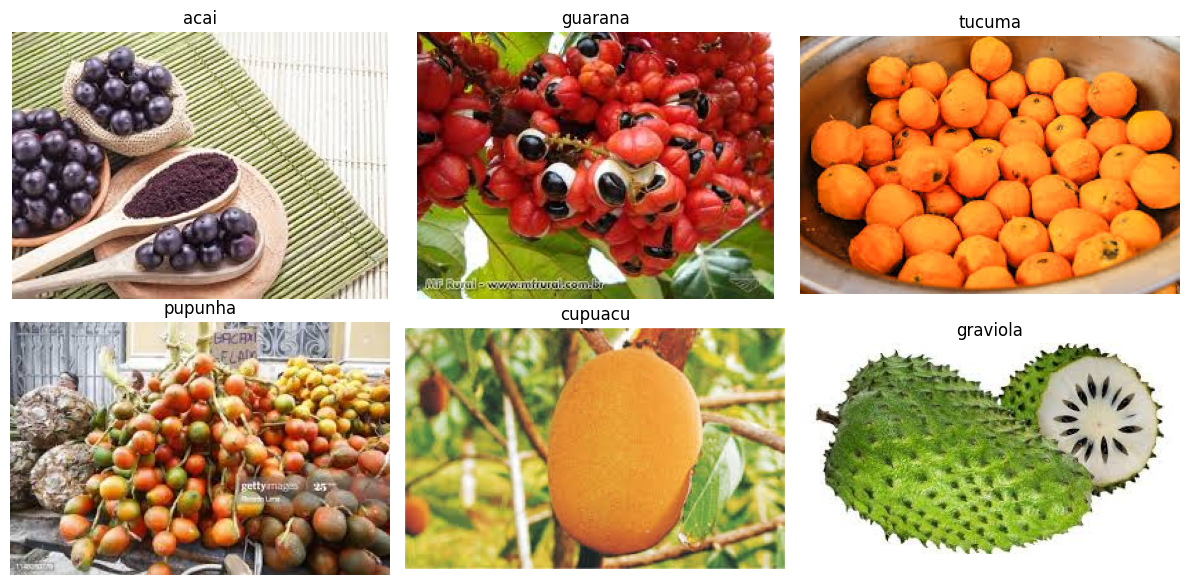

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/FruitinAmazon/train"


#List of class Directories
fruit_classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

#select one random image from each fruit class
selected_images = []
for fruit in fruit_classes:
    fruit_path = os.path.join(train_dir, fruit)
    images = os.listdir(fruit_path)
    if images:
        random_image = random.choice(images)
        selected_images.append((fruit, os.path.join(fruit_path, random_image)))

#determine grid size dynamically based on number of classes
num_classes = len(selected_images)
nrows = 2
ncols = (num_classes + 1) // 2

# Display images in a grid format
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
axes = axes.flatten()

#plot
for ax, (label, img_path) in zip(axes, selected_images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

for ax in axes[len(selected_images):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


What did you observe?


The script scans the train directory and lists all subdirectories (each representing a fruit category).
It randomly selects one image from each fruit category.The code calculates how many rows and columns are needed to display the images.
The grid has two rows and a dynamically calculated number of columns. Uses plt.subplots() to create a grid.
Each selected image is displayed with its fruit category as the title.
Any extra empty grid spaces are turned off to keep the visualization clean.


Check for Corrupted Image
**bold text**





In [ ]:
import os
from PIL import Image

# Get the list of class directories (fruit categories)
fruit_classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

corrupted_images = []

# Iterate through each class subdirectory
for fruit in fruit_classes:
    fruit_path = os.path.join(train_dir, fruit)
    images = os.listdir(fruit_path)

    for image in images:
        image_path = os.path.join(fruit_path, image)
        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify if the image is valid
        except (IOError, SyntaxError):
            os.remove(image_path)  # Remove corrupted image
            corrupted_images.append(image_path)
            print(f"Removed corrupted image: {image_path}")

# Print result
if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


**Task 2: Loading and Preprocessing Image Data in Keras**

In [ ]:
import tensorflow as tf
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=True,
validation_split=validation_split,
subset="training",
seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset="validation",
seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Task 3: Implement a CNN with
Follow the following structure and hyper-parameters:
Convolutional Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


#CNN model
model = models.Sequential([

 # Convolutional Layer 1
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu", input_shape=(128, 128, 3)),
    # Pooling Layer 1
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu"),
    # Pooling Layer 2
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten layer to prepare for Dense layers
    layers.Flatten(),

    # Fully Connected Layer (Dense)
    layers.Dense(128, activation="relu"),

    # Output Layer (Assuming multiple fruit classes)
    layers.Dense(len(fruit_classes), activation="softmax")  # Adjust output units based on number of classes
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,205,350 (16.04 MB)

 Trainable params: 4,205,350 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

Fully Connected Network Architecture:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu", input_shape=(128, 128, 3)),
    # Pooling Layer 1
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu"),
    # Pooling Layer 2
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Network (FCN)
     # Hidden Layer 1 with 64 neurons
    layers.Dense(64, activation="relu"),
     # Hidden Layer 2 with 128 neurons
    layers.Dense(128, activation="relu"),

    # Output Layer (Softmax for multi-class classification)
    #Output neurons = num_classes
    layers.Dense(len(fruit_classes), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

**Task 4: Compile the Model**

Model Compilation


In [ ]:
# Compile the model
model.compile(
    # sgd optimizer
    optimizer='sgd',
     # Loss function for multi-class classification with integer labels
    loss='sparse_categorical_crossentropy',
     # Metric to evaluate the model during training
    metrics=['accuracy']
)


Train the Model

In [ ]:
# Define the callbacks
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    '/content/AashraDangol_fruit_model.h5',  # Save the model as a .h5 file
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode='min',  # 'min' because we want to minimize the loss
    verbose=1  # Print a message when saving the best model
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,  # Stop after 10 epochs with no improvement
    mode='min',  # Stop when validation loss stops decreasing
    verbose=1  # Print a message when stopping early
)

# Train the model using the fit() method
history = model.fit(
    train_ds,  # The training dataset
    epochs=250,  # Number of epochs
    batch_size=16,  # Batch size
    validation_data=val_ds,  # Validation dataset
    callbacks=[checkpoint_callback, early_stopping_callback],  # Callbacks
    verbose=2  # Print detailed progress for each epoch
)

Epoch 1/250

Epoch 1: val_loss improved from inf to 1.68010, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 3s - 846ms/step - accuracy: 0.2083 - loss: 1.7917 - val_accuracy: 0.2778 - val_loss: 1.6801
Epoch 2/250

Epoch 2: val_loss improved from 1.68010 to 1.66060, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 2s - 521ms/step - accuracy: 0.2083 - loss: 1.7731 - val_accuracy: 0.7778 - val_loss: 1.6606
Epoch 3/250

Epoch 3: val_loss did not improve from 1.66060
3/3 - 1s - 497ms/step - accuracy: 0.2639 - loss: 1.7510 - val_accuracy: 0.0000e+00 - val_loss: 1.9637
Epoch 4/250

Epoch 4: val_loss improved from 1.66060 to 1.61653, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 1s - 500ms/step - accuracy: 0.1944 - loss: 1.7694 - val_accuracy: 0.6667 - val_loss: 1.6165
Epoch 5/250

Epoch 5: val_loss did not improve from 1.61653
3/3 - 2s - 827ms/step - accuracy: 0.2917 - loss: 1.7227 - val_accuracy: 0.0000e+00 - val_loss: 1.7628
Epoch 6/250

Epoch 6: val_loss did not improve from 1.61653
3/3 - 2s - 741ms/step - accuracy: 0.2222 - loss: 1.7196 - val_accuracy: 0.0000e+00 - val_loss: 1.8947
Epoch 7/250

Epoch 7: val_loss did not improve from 1.61653
3/3 - 2s - 663ms/step - accuracy: 0.1944 - loss: 1.6923 - val_accuracy: 0.0000e+00 - val_loss: 2.0232
Epoch 8/250

Epoch 8: val_loss did not improve from 1.61653
3/3 - 1s - 478ms/step - accuracy: 0.2222 - loss: 1.7196 - val_accuracy: 0.2222 - val_loss: 1.6564
Epoch 9/250

Epoch 9: val_loss improved from 1.61653 to 1.37535, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 2s - 519ms/step - accuracy: 0.2500 - loss: 1.6303 - val_accuracy: 0.8333 - val_loss: 1.3754
Epoch 10/250

Epoch 10: val_loss did not improve from 1.37535
3/3 - 1s - 488ms/step - accuracy: 0.2778 - loss: 1.6374 - val_accuracy: 0.2222 - val_loss: 1.7150
Epoch 11/250

Epoch 11: val_loss did not improve from 1.37535
3/3 - 3s - 846ms/step - accuracy: 0.2639 - loss: 1.5871 - val_accuracy: 0.0556 - val_loss: 1.8722
Epoch 12/250

Epoch 12: val_loss did not improve from 1.37535
3/3 - 3s - 976ms/step - accuracy: 0.2917 - loss: 1.5776 - val_accuracy: 0.4444 - val_loss: 1.6090
Epoch 13/250

Epoch 13: val_loss improved from 1.37535 to 1.33210, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 2s - 787ms/step - accuracy: 0.3194 - loss: 1.5396 - val_accuracy: 0.6667 - val_loss: 1.3321
Epoch 14/250

Epoch 14: val_loss did not improve from 1.33210
3/3 - 1s - 491ms/step - accuracy: 0.3333 - loss: 1.5068 - val_accuracy: 0.0000e+00 - val_loss: 1.8522
Epoch 15/250

Epoch 15: val_loss improved from 1.33210 to 1.06200, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 3s - 878ms/step - accuracy: 0.2500 - loss: 1.5039 - val_accuracy: 0.8333 - val_loss: 1.0620
Epoch 16/250

Epoch 16: val_loss did not improve from 1.06200
3/3 - 2s - 611ms/step - accuracy: 0.3750 - loss: 1.4604 - val_accuracy: 0.6111 - val_loss: 1.3437
Epoch 17/250

Epoch 17: val_loss did not improve from 1.06200
3/3 - 2s - 549ms/step - accuracy: 0.4028 - loss: 1.4143 - val_accuracy: 0.6111 - val_loss: 1.2758
Epoch 18/250

Epoch 18: val_loss did not improve from 1.06200
3/3 - 1s - 495ms/step - accuracy: 0.3750 - loss: 1.4050 - val_accuracy: 0.3333 - val_loss: 1.7996
Epoch 19/250

Epoch 19: val_loss did not improve from 1.06200
3/3 - 2s - 720ms/step - accuracy: 0.4028 - loss: 1.4209 - val_accuracy: 0.1111 - val_loss: 2.1100
Epoch 20/250

Epoch 20: val_loss improved from 1.06200 to 1.04310, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 2s - 691ms/step - accuracy: 0.5278 - loss: 1.3701 - val_accuracy: 0.8333 - val_loss: 1.0431
Epoch 21/250

Epoch 21: val_loss did not improve from 1.04310
3/3 - 2s - 650ms/step - accuracy: 0.4861 - loss: 1.2748 - val_accuracy: 0.6111 - val_loss: 1.4473
Epoch 22/250

Epoch 22: val_loss improved from 1.04310 to 0.83844, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 3s - 896ms/step - accuracy: 0.5556 - loss: 1.2742 - val_accuracy: 0.8333 - val_loss: 0.8384
Epoch 23/250

Epoch 23: val_loss did not improve from 0.83844
3/3 - 1s - 497ms/step - accuracy: 0.5833 - loss: 1.2596 - val_accuracy: 0.2778 - val_loss: 1.8249
Epoch 24/250

Epoch 24: val_loss did not improve from 0.83844
3/3 - 1s - 485ms/step - accuracy: 0.5694 - loss: 1.2684 - val_accuracy: 0.6111 - val_loss: 1.2800
Epoch 25/250

Epoch 25: val_loss improved from 0.83844 to 0.80092, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 2s - 503ms/step - accuracy: 0.6250 - loss: 1.2203 - val_accuracy: 0.8333 - val_loss: 0.8009
Epoch 26/250

Epoch 26: val_loss did not improve from 0.80092
3/3 - 3s - 1s/step - accuracy: 0.5417 - loss: 1.2020 - val_accuracy: 0.0000e+00 - val_loss: 2.0394
Epoch 27/250

Epoch 27: val_loss did not improve from 0.80092
3/3 - 1s - 483ms/step - accuracy: 0.5972 - loss: 1.1656 - val_accuracy: 0.7778 - val_loss: 1.0166
Epoch 28/250

Epoch 28: val_loss did not improve from 0.80092
3/3 - 1s - 480ms/step - accuracy: 0.7083 - loss: 1.0525 - val_accuracy: 0.3889 - val_loss: 1.0297
Epoch 29/250

Epoch 29: val_loss improved from 0.80092 to 0.74924, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 3s - 859ms/step - accuracy: 0.5972 - loss: 1.1147 - val_accuracy: 0.8333 - val_loss: 0.7492
Epoch 30/250

Epoch 30: val_loss did not improve from 0.74924
3/3 - 1s - 487ms/step - accuracy: 0.5417 - loss: 1.0388 - val_accuracy: 0.7778 - val_loss: 0.7564
Epoch 31/250

Epoch 31: val_loss did not improve from 0.74924
3/3 - 3s - 855ms/step - accuracy: 0.6944 - loss: 0.9480 - val_accuracy: 0.8333 - val_loss: 0.8721
Epoch 32/250

Epoch 32: val_loss improved from 0.74924 to 0.56875, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 3s - 840ms/step - accuracy: 0.6806 - loss: 1.0412 - val_accuracy: 0.8889 - val_loss: 0.5687
Epoch 33/250

Epoch 33: val_loss did not improve from 0.56875
3/3 - 2s - 570ms/step - accuracy: 0.6944 - loss: 1.0669 - val_accuracy: 0.6111 - val_loss: 0.9083
Epoch 34/250

Epoch 34: val_loss did not improve from 0.56875
3/3 - 2s - 777ms/step - accuracy: 0.8056 - loss: 0.8162 - val_accuracy: 0.4444 - val_loss: 1.2479
Epoch 35/250

Epoch 35: val_loss did not improve from 0.56875
3/3 - 3s - 848ms/step - accuracy: 0.5972 - loss: 0.9761 - val_accuracy: 0.8333 - val_loss: 0.8949
Epoch 36/250

Epoch 36: val_loss improved from 0.56875 to 0.42479, saving model to /content/AashraDangol_fruit_model.h5


3/3 - 3s - 872ms/step - accuracy: 0.7500 - loss: 0.7722 - val_accuracy: 0.9444 - val_loss: 0.4248
Epoch 37/250

Epoch 37: val_loss did not improve from 0.42479
3/3 - 3s - 1s/step - accuracy: 0.5000 - loss: 1.1361 - val_accuracy: 0.2778 - val_loss: 1.7601
Epoch 38/250

Epoch 38: val_loss did not improve from 0.42479
3/3 - 2s - 658ms/step - accuracy: 0.7778 - loss: 0.8611 - val_accuracy: 0.7222 - val_loss: 0.8618
Epoch 39/250

Epoch 39: val_loss did not improve from 0.42479
3/3 - 2s - 684ms/step - accuracy: 0.7917 - loss: 0.7131 - val_accuracy: 0.7778 - val_loss: 0.8661
Epoch 40/250

Epoch 40: val_loss did not improve from 0.42479
3/3 - 1s - 496ms/step - accuracy: 0.7500 - loss: 1.0059 - val_accuracy: 0.3889 - val_loss: 1.3611
Epoch 41/250

Epoch 41: val_loss did not improve from 0.42479
3/3 - 3s - 844ms/step - accuracy: 0.8611 - loss: 0.6083 - val_accuracy: 0.7778 - val_loss: 0.7549
Epoch 42/250

Epoch 42: val_loss did not improve from 0.42479
3/3 - 3s - 854ms/step - accuracy: 0.5139 - 

Task 5: Model Evaluation

In [ ]:
# Evaluate the model on the test dataset
# Assuming val_ds is used as the test set
test_loss, test_accuracy = model.evaluate(val_ds)

# Print test results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.3333 - loss: 2.0530
Test Accuracy: 33.33%
Test Loss: 2.0530


Task 6: Save and Load the Model
Model Saving and Loading

In [ ]:
# Save the trained model properly
model.save("/content/FruitinAmazon/fruit_classification_model.h5", save_format="h5")
print("Model saved successfully.")


Model saved successfully.


In [ ]:
# Reload the model
loaded_model = tf.keras.models.load_model("/content/FruitinAmazon/fruit_classification_model.h5")
print("Model loaded successfully.")

# Print model summary
loaded_model.summary()


Model loaded successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,456 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Load the saved model and re-evaluate its performance on the test set.

In [ ]:
img_height = 128
img_width = 128
batch_size = 16

# Apply the same normalization as during training
rescale = tf.keras.layers.Rescaling(1./255)

# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/FruitinAmazon/test",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # No shuffling to match predictions with labels
)

# Normalize the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))


Found 30 files belonging to 6 classes.


In [ ]:
# Evaluate the model
test_loss, test_accuracy = loaded_model.evaluate(test_ds, verbose=2)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")


2/2 - 1s - 381ms/step - accuracy: 0.4000 - loss: 1.9502
Test Loss: 1.9502
Test Accuracy: 40.0000%


Task 7: Predictions and Classification Report
Making Predictions

Model Prediction

In [ ]:
import numpy as np

# Make predictions on the test dataset
predictions = loaded_model.predict(test_ds)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


Classification Report

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Load the test dataset without mapping to get class names
raw_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/FruitinAmazon/test",
    image_size=(128, 128),
    batch_size=16,
    shuffle=False  # No shuffling to match predictions with labels
)

# Get class names from the dataset
class_names = raw_test_ds.class_names  # This works because raw_test_ds retains class names
print("Class Names:", class_names)

# Now, apply normalization again
test_ds = raw_test_ds.map(lambda x, y: (x / 255.0, y))

# Make predictions
predictions = loaded_model.predict(test_ds)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the dataset
true_labels = np.concatenate([y.numpy() for _, y in test_ds])

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", report)


Found 30 files belonging to 6 classes.
Class Names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Classification Report:
               precision    recall  f1-score   support

        acai       1.00      0.20      0.33         5
     cupuacu       0.33      0.60      0.43         5
    graviola       0.45      1.00      0.62         5
     guarana       0.33      0.60      0.43         5
     pupunha       0.00      0.00      0.00         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.40        30
   macro avg       0.35      0.40      0.30        30
weighted avg       0.35      0.40      0.30        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  Confusion Matrx

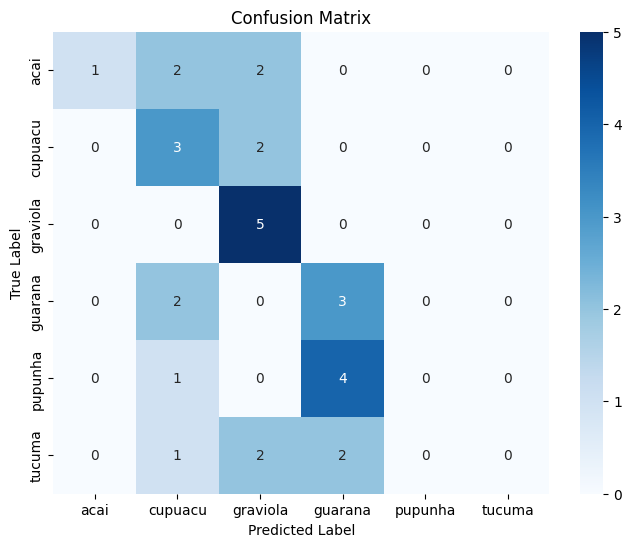

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
